In [1]:
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [3]:
df = pd.read_csv('data/Default.csv', index_col=0) # Cometeu fraude como banco

In [4]:
df.head()

,default,student,balance,income
1,No,No,729.526495,44361.625074
2,No,Yes,817.180407,12106.134700
3,No,No,1073.549164,31767.138947
4,No,No,529.250605,35704.493935
5,No,No,785.655883,38463.495879


In [5]:
df['is_fraud'] = df.default.apply(lambda x : 1 if x == "Yes" else 0)

# Validation Strategy

The validation strategy is one of the most important steps in machine learning. If one fails to effectivelly validate your machine learning model, the results may be unexpectedly bad.

The idea is to create steps that will help you make a good estimate of your error on data as it will come in real life. We've seen that:
- if your model is too complex, it may memorize your training data (high variance)
- if your model is too simple, you'll have performance problems (high bias)

If your model memorizes your training data, you'll probably obtain a good performance score on your data, but when real data comes to you, you'll lose performance. We say that the model didn't `GENERALIZE` the patterns to unseen data. It means your error estimates were wrong. What can we do to avoid that?

We can simulate what real life would look like. For example, one strategy is to hide some data from your model, to check its reliability on this never-seen data.

## Hold-Out

In [6]:
def draw_rects(N, ax, textprop={}):
    
    for i in range(N):
        if i == 1:
            ax.add_patch(plt.Rectangle((0, i), 5, 0.7, fc='white', ec='k'), )
            ax.add_patch(plt.Rectangle((7. * i / N, i), 3. / N, 0.7, fc='lightblue', ec='k'), )

            ax.text(2.5 * (i + 0.5) / N, i + 0.35, 'Training\nSet', ha='center', va='center', **textprop)
            ax.text(5.65 * (i + 0.5) / N, i + 0.35, 'Test\nSet', ha='center', va='center', **textprop)
            ax.text(0, i + 0.35, f'', ha='right', va='center', **textprop)
    
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.set_xticklabels('')
    ax.set_xticks([])
    ax.set_yticklabels('')
    ax.set_yticks([])
    ax.set_xlim(-1, 6)
    ax.set_ylim(0.5, N + .2)

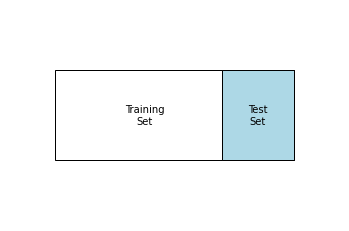

In [7]:
fig, ax = plt.subplots()
draw_rects(2, ax)

The idea of the hold-out is to hide a part of the dataset and use it to test your model performance. The errors measured on your `Test set` will be a better estimate of the model performance in real life.

An important observation is that your model may be performing fairly well on your `Training Set`, but your `Test Set` performance may be poor. This may indicate your model is memorizing your data. 

There are several things that can be happening if you observe that your model is performing much better on the `Training data` than in your `Test data`.

- Model is too complex
    - solution: use a strategy to penalize model complexity if it doesn't bring much gain (regularization)
    
- Data Leakage
    - you may be using some information that you shouldn't have in your training. Information from the future. 

## Holdout in Python

Usually, people tend to separate approximately 20% of the dataset as a test (or holdout) set.

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
X = df[['balance']]
y = df['is_fraud']

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [11]:
len(df[['balance']])

10000

In [12]:
len(X_train)

7500

In [13]:
len(X_test)

2500

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=6000)

In [16]:
len(X_train)

4000

In [17]:
len(X_test)

6000

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, shuffle=False)

# X_train = X.iloc[0:8000]
# X_test = X.iloc[8000:10000]

# y_train = y.iloc[0:8000]
# y_test = y.iloc[8000:10000]

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=42)

In [20]:
len(X_train)

8000

## Your error should be estimated using the `Test Set`. This will be a better estimate of your true error.

Not only that, you should also calculate the error on your `Training Set` (called `training error`). This will be a good comparison to check whether your results on your `Test Set` (called `test error`) are getting too far from the results on your `Test Set`, which, again, can indicate an overfitting.

## Data Leakage example

In [21]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

In [22]:
X = df[['balance']]
y = df['income']

In [ ]:
# (X - X.mean())/X.std()

In [23]:
X = df[['balance']]
y = df['income']

scaler = StandardScaler()
scaler.fit(X)

StandardScaler()

In [24]:
scaler.mean_

array([835.37488561])

In [25]:
X.mean()

balance    835.374886
dtype: float64

In [26]:
X.std()

balance    483.714985
dtype: float64

In [27]:
scaler.scale_

array([483.69079885])

In [28]:
X

,balance
1,729.526495
2,817.180407
3,1073.549164
4,529.250605
5,785.655883
...,...
9996,711.555020
9997,757.962918
9998,845.411989
9999,1569.009053


In [29]:
X_transf = scaler.transform(X)
X_transf

array([[-0.21883482],
       [-0.03761593],
       [ 0.49241019],
       ...,
       [ 0.02075107],
       [ 1.51674204],
       [-1.31169066]])

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X_transf, y)

In [31]:
model = LinearRegression()

model.fit(X_train, y_train)

LinearRegression()

In [32]:
model.score(X_test, y_test)

0.02502072869945604

In [33]:
model.score(X_train, y_train)

0.02248403192308568

What's wrong with the process above?

## Solution: the EXACT same steps used to prepare your training data should be used on the new data 


So, you fit the standard scaler on your training data, and don't fit it again on your test data. Effectively, you'll be using the `mean` and `standard deviation` from the StandardScaler as you've seen on your training data (<b>pipelines</b> will soon come to rescue us for that).

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [41]:
# Standardize data:
scaler = StandardScaler()
scaler.fit(X_train)
X_train_transf = scaler.transform(X_train)

In [42]:
model = LinearRegression()

model.fit(X_train_transf, y_train)

LinearRegression()

In [43]:
scaler = StandardScaler()
scaler.fit(X_test)
X_test_transf = scaler.transform(X_test)

In [44]:
model.score(X_test_transf, y_test)

0.024387180987619494

In [45]:
model.score(X_train_transf, y_train)

0.0227463146136877